In [1]:
import stlearn as st
from pathlib import Path
import pandas as pd
import sys

In [2]:
file = Path("../stimage").resolve()
parent= file.parent
sys.path.append(str(parent))

In [3]:
from stimage.utils import gene_plot, Read10X, ReadOldST, negative_binomial_layer, negative_binomial_loss

In [4]:
BASE_PATH = Path("/scratch/imb/Xiao/unet")
TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
SAMPLE = "Sample1"
Sample1 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample1_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample1.obs["f_index"] = Sample1.obs["imagerow"].astype(str) + "-" + Sample1.obs["imagecol"].astype(str)
Sample1_features = Sample1_features.reindex(Sample1.obs["f_index"])
Sample1_features.index = Sample1.obs_names
Sample1.obsm["features"] = Sample1_features

Added tissue image to the object!


In [6]:
SAMPLE = "Sample2"
Sample2 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample2_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample2.obs["f_index"] = Sample2.obs["imagerow"].astype(str) + "-" + Sample2.obs["imagecol"].astype(str)
Sample2_features = Sample2_features.reindex(Sample2.obs["f_index"])
Sample2_features.index = Sample2.obs_names
Sample2.obsm["features"] = Sample2_features

Added tissue image to the object!


In [7]:
SAMPLE = "Sample3"
Sample3 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample3_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample3.obs["f_index"] = Sample3.obs["imagerow"].astype(str) + "-" + Sample3.obs["imagecol"].astype(str)
Sample3_features = Sample3_features.reindex(Sample3.obs["f_index"])
Sample3_features.index = Sample3.obs_names
Sample3.obsm["features"] = Sample3_features

Added tissue image to the object!


In [8]:
SAMPLE = "Sample4"
Sample4 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample4_features = pd.read_csv(BASE_PATH / ("features/valid/"+SAMPLE+".csv"), index_col=0)
Sample4.obs["f_index"] = Sample4.obs["imagerow"].astype(str) + "-" + Sample4.obs["imagecol"].astype(str)
Sample4_features = Sample4_features.reindex(Sample4.obs["f_index"])
Sample4_features.index = Sample4.obs_names
Sample4.obsm["features"] = Sample4_features

Added tissue image to the object!


In [9]:
SAMPLE = "Sample5"
Sample5 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample5_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample5.obs["f_index"] = Sample5.obs["imagerow"].astype(str) + "-" + Sample5.obs["imagecol"].astype(str)
Sample5_features = Sample5_features.reindex(Sample5.obs["f_index"])
Sample5_features.index = Sample5.obs_names
Sample5.obsm["features"] = Sample5_features

Added tissue image to the object!


In [10]:
SAMPLE = "Sample6"
Sample6 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample6_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample6.obs["f_index"] = Sample6.obs["imagerow"].astype(str) + "-" + Sample6.obs["imagecol"].astype(str)
Sample6_features = Sample6_features.reindex(Sample6.obs["f_index"])
Sample6_features.index = Sample6.obs_names
Sample6.obsm["features"] = Sample6_features

Added tissue image to the object!


In [11]:
# BASE_PATH = Path("/clusterdata/uqxtan9/Xiao/STimage/dataset/TBI_visium/A1")
# TILE_PATH = BASE_PATH / "tiles"
# TILE_PATH.mkdir(parents=True, exist_ok=True)

In [12]:
# Plp1 Aqp4 ERMN Apold1 Ccl4 Reln Pdgfra Dsp
gene_list=["ENSMUSG00000031425", "ENSMUSG00000024411", "ENSMUSG00000026830", 
           "ENSMUSG00000090698", "ENSMUSG00000018930", "ENSMUSG00000042453",
           "ENSMUSG00000029231", "ENSMUSG00000054889"]
gene = gene_list[0]

In [13]:
for adata in [
    Sample1,
    Sample2,
    Sample3,
    Sample4,
    Sample5,
    Sample6,
]:
#     count_df = adata.to_df()
#     count_df[count_df <=1] = 0
#     count_df[count_df >1] = 1
#     adata.X = count_df
#     adata[:,gene_list]
#     st.pp.filter_genes(adata,min_cells=1)
#     st.pp.normalize_total(adata)
#     st.pp.log1p(adata)
#     st.pp.scale(adata)

    # pre-processing for spot image
    TILE_PATH_ = TILE_PATH / list(Sample6.uns["spatial"].keys())[0]
    TILE_PATH_.mkdir(parents=True, exist_ok=True)
    st.pp.tiling(adata, TILE_PATH_, crop_size=40)
    st.pp.extract_feature(adata)
    
    
    

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   8%|▊          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   5%|▍          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   6%|▋          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   8%|▊          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]
Tiling image:   6%|▋          [ time left: 00:01 ]

The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


In [14]:
Sample1

AnnData object with n_obs × n_vars = 640 × 22108
    obs: 'imagecol', 'imagerow', 'sum_counts', 'f_index', 'tile_path'
    uns: 'spatial'
    obsm: 'spatial', 'features', 'X_tile_feature', 'X_morphology'

In [15]:
training_dataset = Sample1.concatenate(
    [Sample2, Sample3],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample1.uns["spatial"],
            Sample2.uns["spatial"],
            Sample3.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [16]:
valid_dataset = Sample4.copy()

In [17]:
test_dataset = Sample5.concatenate(
    [Sample6],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample5.uns["spatial"],
            Sample6.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,200))

In [19]:
train_X = training_dataset.obsm["X_tile_feature"]
# train_Y = scaler.fit_transform(training_dataset[:,gene].to_df())
train_Y = training_dataset[:,gene].to_df()

/scratch/imb/Xiao/.conda/envs/stimage/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [20]:
valid_X = valid_dataset.obsm["X_tile_feature"]
# valid_Y = scaler.fit_transform(valid_dataset[:,gene].to_df())
valid_Y = valid_dataset[:,gene].to_df()

In [21]:
test_X = test_dataset.obsm["X_tile_feature"]
# test_Y = scaler.fit_transform(test_dataset[:,gene].to_df())
test_Y = test_dataset[:,gene].to_df()

In [22]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
print(tf.__version__)

2.4.0


# cnn + linear

In [23]:
def build_model():
    inputs = Input(shape=(2048,))
    outputs = Dropout(0.6)(inputs)
#     outputs = Dense(512,)(outputs)
#     outputs = Dense(256, activation='relu')(inputs)
#     outputs = Dropout(0.5)(outputs)
    outputs = Dense(1, activation='linear')(inputs)
    
    model = Model(inputs=inputs, outputs=outputs)

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
#     optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model

In [24]:
model = build_model()

In [25]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/500
20/20 [==============================] - 1s 36ms/step - loss: 569.2344 - mse: 569.2344 - val_loss: 150.4050 - val_mse: 150.4050
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 525.4849 - mse: 525.4850 - val_loss: 139.6363 - val_mse: 139.6363
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 515.6777 - mse: 515.6777 - val_loss: 131.5224 - val_mse: 131.5224
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 486.4446 - mse: 486.4446 - val_loss: 125.6097 - val_mse: 125.6097
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 456.0235 - mse: 456.0235 - val_loss: 121.4863 - val_mse: 121.4863
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 457.1295 - mse: 457.1295 - val_loss: 118.8530 - val_mse: 118.8530
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 430.1167 - mse: 430.1167 - val_loss: 117.3020 - val_mse: 117.3020
Epoch 8/500
20/20 [=======

20/20 [==============================] - 0s 4ms/step - loss: 290.4350 - mse: 290.4350 - val_loss: 113.4557 - val_mse: 113.4557
Epoch 60/500
20/20 [==============================] - 0s 4ms/step - loss: 285.8856 - mse: 285.8856 - val_loss: 113.6774 - val_mse: 113.6774
Epoch 61/500
20/20 [==============================] - 0s 4ms/step - loss: 311.2927 - mse: 311.2927 - val_loss: 113.4711 - val_mse: 113.4711
Epoch 62/500
20/20 [==============================] - 0s 3ms/step - loss: 291.5741 - mse: 291.5741 - val_loss: 113.2377 - val_mse: 113.2377
Epoch 63/500
20/20 [==============================] - 0s 2ms/step - loss: 315.8826 - mse: 315.8826 - val_loss: 113.3937 - val_mse: 113.3937
Epoch 64/500
20/20 [==============================] - 0s 3ms/step - loss: 300.7232 - mse: 300.7232 - val_loss: 113.5172 - val_mse: 113.5172
Epoch 65/500
20/20 [==============================] - 0s 3ms/step - loss: 294.9316 - mse: 294.9316 - val_loss: 113.7390 - val_mse: 113.7390
Epoch 66/500
20/20 [=============

20/20 [==============================] - 0s 3ms/step - loss: 245.6648 - mse: 245.6648 - val_loss: 119.7660 - val_mse: 119.7660
Epoch 118/500
20/20 [==============================] - 0s 2ms/step - loss: 278.9875 - mse: 278.9875 - val_loss: 119.8900 - val_mse: 119.8900
Epoch 119/500
20/20 [==============================] - 0s 3ms/step - loss: 282.2085 - mse: 282.2085 - val_loss: 119.4563 - val_mse: 119.4563
Epoch 120/500
20/20 [==============================] - 0s 3ms/step - loss: 293.7235 - mse: 293.7235 - val_loss: 119.3610 - val_mse: 119.3610
Epoch 121/500
20/20 [==============================] - 0s 3ms/step - loss: 287.7213 - mse: 287.7213 - val_loss: 119.4847 - val_mse: 119.4847
Epoch 122/500
20/20 [==============================] - 0s 2ms/step - loss: 279.1238 - mse: 279.1238 - val_loss: 119.6821 - val_mse: 119.6821
Epoch 123/500
20/20 [==============================] - 0s 2ms/step - loss: 280.1617 - mse: 280.1617 - val_loss: 119.4906 - val_mse: 119.4906
Epoch 124/500
20/20 [======

20/20 [==============================] - 0s 3ms/step - loss: 278.5804 - mse: 278.5804 - val_loss: 126.0890 - val_mse: 126.0890
Epoch 176/500
20/20 [==============================] - 0s 4ms/step - loss: 245.5984 - mse: 245.5984 - val_loss: 126.5155 - val_mse: 126.5155
Epoch 177/500
20/20 [==============================] - 0s 4ms/step - loss: 244.2132 - mse: 244.2132 - val_loss: 127.2255 - val_mse: 127.2255
Epoch 178/500
20/20 [==============================] - 0s 4ms/step - loss: 254.9272 - mse: 254.9272 - val_loss: 127.2410 - val_mse: 127.2410
Epoch 179/500
20/20 [==============================] - 0s 2ms/step - loss: 269.5904 - mse: 269.5904 - val_loss: 126.6857 - val_mse: 126.6857
Epoch 180/500
20/20 [==============================] - 0s 3ms/step - loss: 226.4567 - mse: 226.4567 - val_loss: 127.2158 - val_mse: 127.2158
Epoch 181/500
20/20 [==============================] - 0s 2ms/step - loss: 231.6540 - mse: 231.6540 - val_loss: 127.0450 - val_mse: 127.0450
Epoch 182/500
20/20 [======

20/20 [==============================] - 0s 3ms/step - loss: 247.4557 - mse: 247.4557 - val_loss: 130.7498 - val_mse: 130.7498
Epoch 234/500
20/20 [==============================] - 0s 4ms/step - loss: 269.5800 - mse: 269.5800 - val_loss: 131.6757 - val_mse: 131.6757
Epoch 235/500
20/20 [==============================] - 0s 4ms/step - loss: 262.1120 - mse: 262.1120 - val_loss: 130.7607 - val_mse: 130.7607
Epoch 236/500
20/20 [==============================] - 0s 3ms/step - loss: 284.7341 - mse: 284.7341 - val_loss: 130.1639 - val_mse: 130.1639
Epoch 237/500
20/20 [==============================] - 0s 2ms/step - loss: 232.8139 - mse: 232.8139 - val_loss: 131.5365 - val_mse: 131.5365
Epoch 238/500
20/20 [==============================] - 0s 3ms/step - loss: 252.2856 - mse: 252.2856 - val_loss: 130.9654 - val_mse: 130.9654
Epoch 239/500
20/20 [==============================] - 0s 3ms/step - loss: 249.0111 - mse: 249.0111 - val_loss: 131.5049 - val_mse: 131.5049
Epoch 240/500
20/20 [======

20/20 [==============================] - 0s 4ms/step - loss: 240.2714 - mse: 240.2714 - val_loss: 135.0525 - val_mse: 135.0525
Epoch 292/500
20/20 [==============================] - 0s 3ms/step - loss: 233.6724 - mse: 233.6724 - val_loss: 134.8320 - val_mse: 134.8320
Epoch 293/500
20/20 [==============================] - 0s 4ms/step - loss: 255.1874 - mse: 255.1874 - val_loss: 134.6355 - val_mse: 134.6355
Epoch 294/500
20/20 [==============================] - 0s 4ms/step - loss: 214.5990 - mse: 214.5990 - val_loss: 134.7496 - val_mse: 134.7496
Epoch 295/500
20/20 [==============================] - 0s 4ms/step - loss: 242.6416 - mse: 242.6416 - val_loss: 135.1820 - val_mse: 135.1820
Epoch 296/500
20/20 [==============================] - 0s 3ms/step - loss: 212.6481 - mse: 212.6481 - val_loss: 135.4510 - val_mse: 135.4510
Epoch 297/500
20/20 [==============================] - 0s 3ms/step - loss: 238.7607 - mse: 238.7607 - val_loss: 135.0433 - val_mse: 135.0433
Epoch 298/500
20/20 [======

20/20 [==============================] - 0s 4ms/step - loss: 213.8731 - mse: 213.8731 - val_loss: 137.2845 - val_mse: 137.2845
Epoch 350/500
20/20 [==============================] - 0s 2ms/step - loss: 227.9770 - mse: 227.9770 - val_loss: 137.5702 - val_mse: 137.5702
Epoch 351/500
20/20 [==============================] - 0s 3ms/step - loss: 263.0343 - mse: 263.0343 - val_loss: 137.9409 - val_mse: 137.9409
Epoch 352/500
20/20 [==============================] - 0s 3ms/step - loss: 224.2665 - mse: 224.2665 - val_loss: 138.2064 - val_mse: 138.2064
Epoch 353/500
20/20 [==============================] - 0s 4ms/step - loss: 243.2938 - mse: 243.2938 - val_loss: 137.3199 - val_mse: 137.3199
Epoch 354/500
20/20 [==============================] - 0s 3ms/step - loss: 223.1006 - mse: 223.1006 - val_loss: 137.2995 - val_mse: 137.2995
Epoch 355/500
20/20 [==============================] - 0s 3ms/step - loss: 225.2466 - mse: 225.2466 - val_loss: 137.4220 - val_mse: 137.4220
Epoch 356/500
20/20 [======

20/20 [==============================] - 0s 4ms/step - loss: 218.8642 - mse: 218.8642 - val_loss: 140.3570 - val_mse: 140.3570
Epoch 408/500
20/20 [==============================] - 0s 3ms/step - loss: 223.2371 - mse: 223.2371 - val_loss: 139.5981 - val_mse: 139.5981
Epoch 409/500
20/20 [==============================] - 0s 4ms/step - loss: 237.5752 - mse: 237.5752 - val_loss: 139.7710 - val_mse: 139.7710
Epoch 410/500
20/20 [==============================] - 0s 3ms/step - loss: 219.6952 - mse: 219.6952 - val_loss: 139.6554 - val_mse: 139.6554
Epoch 411/500
20/20 [==============================] - 0s 2ms/step - loss: 219.9462 - mse: 219.9462 - val_loss: 139.9748 - val_mse: 139.9748
Epoch 412/500
20/20 [==============================] - 0s 4ms/step - loss: 228.2732 - mse: 228.2732 - val_loss: 139.7175 - val_mse: 139.7175
Epoch 413/500
20/20 [==============================] - 0s 4ms/step - loss: 230.5750 - mse: 230.5750 - val_loss: 140.2541 - val_mse: 140.2541
Epoch 414/500
20/20 [======

20/20 [==============================] - 0s 2ms/step - loss: 227.3156 - mse: 227.3156 - val_loss: 142.3416 - val_mse: 142.3416
Epoch 466/500
20/20 [==============================] - 0s 2ms/step - loss: 221.6581 - mse: 221.6581 - val_loss: 142.1548 - val_mse: 142.1548
Epoch 467/500
20/20 [==============================] - 0s 3ms/step - loss: 218.2861 - mse: 218.2861 - val_loss: 142.5428 - val_mse: 142.5428
Epoch 468/500
20/20 [==============================] - 0s 4ms/step - loss: 200.9600 - mse: 200.9600 - val_loss: 141.9037 - val_mse: 141.9037
Epoch 469/500
20/20 [==============================] - 0s 4ms/step - loss: 251.5835 - mse: 251.5835 - val_loss: 141.5663 - val_mse: 141.5663
Epoch 470/500
20/20 [==============================] - 0s 3ms/step - loss: 220.5385 - mse: 220.5385 - val_loss: 141.3387 - val_mse: 141.3387
Epoch 471/500
20/20 [==============================] - 0s 4ms/step - loss: 199.8683 - mse: 199.8683 - val_loss: 141.6829 - val_mse: 141.6829
Epoch 472/500
20/20 [======

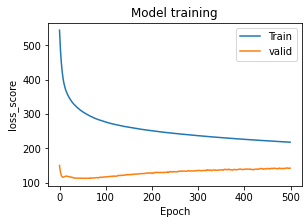

In [26]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [27]:
test_predictions = model.predict(test_X)
test_dataset.obsm["predicted_gene"] = test_predictions

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


/scratch/imb/Xiao/.conda/envs/stimage/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/scratch/imb/Xiao/STimage/stimage/utils.py:106: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


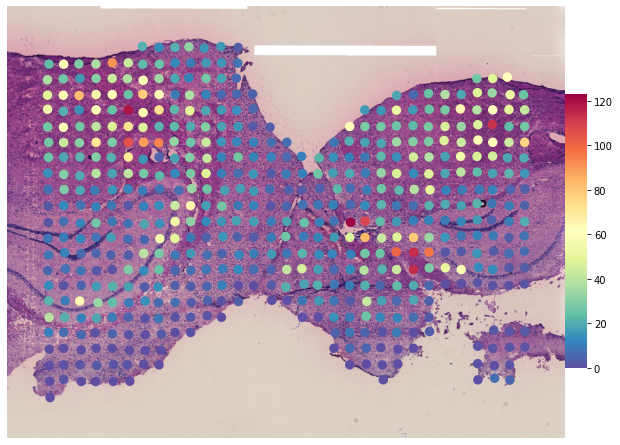


ENSMUSG00000031425:


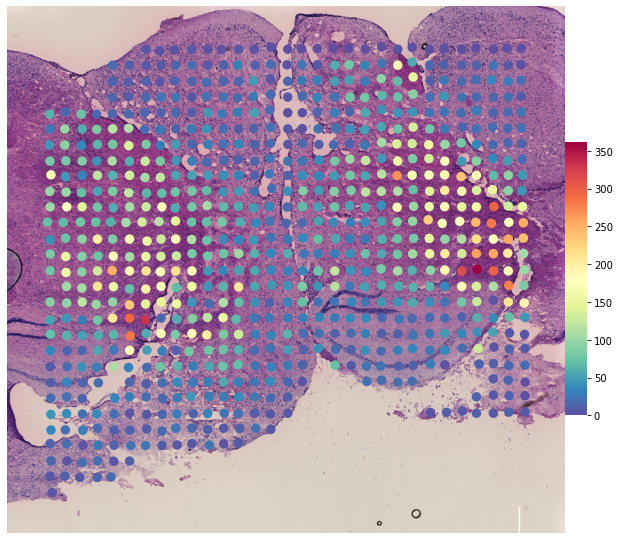

In [28]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


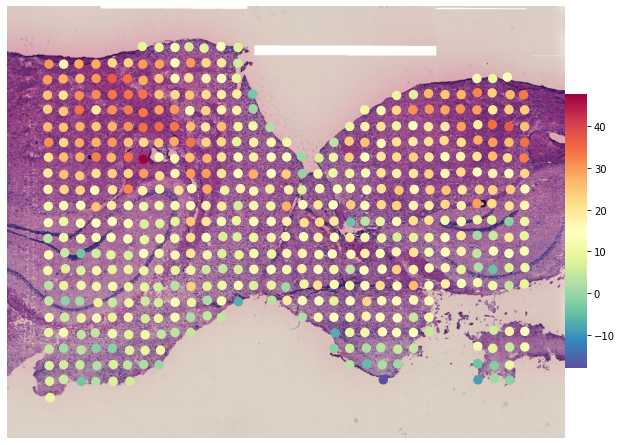


ENSMUSG00000031425:


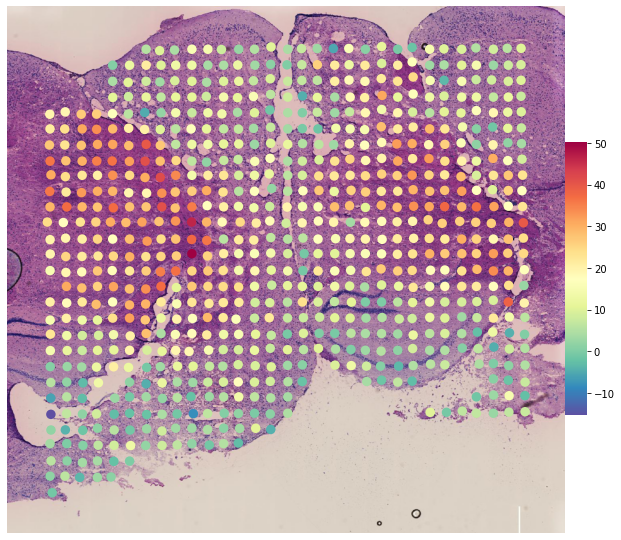

In [29]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [30]:
def build_model():
    inputs = Input(shape=(2048,))
    outputs = Dropout(0.5)(inputs)
#     outputs = Dense(512,)(outputs)
#     outputs = Dense(256, activation='relu')(inputs)
#     outputs = Dropout(0.5)(outputs)
    outputs = Dense(2)(outputs)
    distribution_outputs = Lambda(negative_binomial_layer)(outputs)
    
    model = Model(inputs=inputs, outputs=distribution_outputs)

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
#     optimizer = tf.keras.optimizers.Adam()

    model.compile(loss=negative_binomial_loss,
                optimizer=optimizer,
                metrics=[negative_binomial_loss])
    return model

In [31]:
model = build_model()

In [32]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/500
20/20 [==============================] - 1s 24ms/step - loss: 14.0701 - negative_binomial_loss: 14.0701 - val_loss: 3.7329 - val_negative_binomial_loss: 3.7329
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 10.9729 - negative_binomial_loss: 10.9729 - val_loss: 3.5292 - val_negative_binomial_loss: 3.5292
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 9.5604 - negative_binomial_loss: 9.5604 - val_loss: 3.4272 - val_negative_binomial_loss: 3.4272
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 8.7163 - negative_binomial_loss: 8.7163 - val_loss: 3.4529 - val_negative_binomial_loss: 3.4529
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 7.3377 - negative_binomial_loss: 7.3377 - val_loss: 3.5399 - val_negative_binomial_loss: 3.5399
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 6.4871 - negative_binomial_loss: 6.4871 - val_loss: 3.6044 - val_negative_bin

20/20 [==============================] - 0s 5ms/step - loss: 3.9272 - negative_binomial_loss: 3.9272 - val_loss: 3.2179 - val_negative_binomial_loss: 3.2179
Epoch 50/500
20/20 [==============================] - 0s 4ms/step - loss: 3.9429 - negative_binomial_loss: 3.9429 - val_loss: 3.1991 - val_negative_binomial_loss: 3.1991
Epoch 51/500
20/20 [==============================] - 0s 4ms/step - loss: 3.9616 - negative_binomial_loss: 3.9616 - val_loss: 3.1925 - val_negative_binomial_loss: 3.1925
Epoch 52/500
20/20 [==============================] - 0s 5ms/step - loss: 3.9414 - negative_binomial_loss: 3.9414 - val_loss: 3.2066 - val_negative_binomial_loss: 3.2066
Epoch 53/500
20/20 [==============================] - 0s 5ms/step - loss: 3.9670 - negative_binomial_loss: 3.9670 - val_loss: 3.2026 - val_negative_binomial_loss: 3.2026
Epoch 54/500
20/20 [==============================] - 0s 4ms/step - loss: 3.8874 - negative_binomial_loss: 3.8874 - val_loss: 3.1833 - val_negative_binomial_loss: 

20/20 [==============================] - 0s 5ms/step - loss: 3.7048 - negative_binomial_loss: 3.7048 - val_loss: 3.1809 - val_negative_binomial_loss: 3.1809
Epoch 98/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6301 - negative_binomial_loss: 3.6301 - val_loss: 3.1168 - val_negative_binomial_loss: 3.1168
Epoch 99/500
20/20 [==============================] - 0s 5ms/step - loss: 3.7247 - negative_binomial_loss: 3.7247 - val_loss: 3.1554 - val_negative_binomial_loss: 3.1554
Epoch 100/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6712 - negative_binomial_loss: 3.6712 - val_loss: 3.1264 - val_negative_binomial_loss: 3.1264
Epoch 101/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6575 - negative_binomial_loss: 3.6575 - val_loss: 3.1877 - val_negative_binomial_loss: 3.1877
Epoch 102/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6895 - negative_binomial_loss: 3.6895 - val_loss: 3.1756 - val_negative_binomial_los

20/20 [==============================] - 0s 4ms/step - loss: 3.5957 - negative_binomial_loss: 3.5957 - val_loss: 3.1424 - val_negative_binomial_loss: 3.1424
Epoch 146/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6125 - negative_binomial_loss: 3.6125 - val_loss: 3.1909 - val_negative_binomial_loss: 3.1909
Epoch 147/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6181 - negative_binomial_loss: 3.6181 - val_loss: 3.1494 - val_negative_binomial_loss: 3.1494
Epoch 148/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6749 - negative_binomial_loss: 3.6749 - val_loss: 3.1573 - val_negative_binomial_loss: 3.1573
Epoch 149/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6636 - negative_binomial_loss: 3.6636 - val_loss: 3.1045 - val_negative_binomial_loss: 3.1045
Epoch 150/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6635 - negative_binomial_loss: 3.6635 - val_loss: 3.1734 - val_negative_binomial_l

Epoch 193/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5805 - negative_binomial_loss: 3.5805 - val_loss: 3.1115 - val_negative_binomial_loss: 3.1115
Epoch 194/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5497 - negative_binomial_loss: 3.5497 - val_loss: 3.1460 - val_negative_binomial_loss: 3.1460
Epoch 195/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5680 - negative_binomial_loss: 3.5680 - val_loss: 3.1567 - val_negative_binomial_loss: 3.1567
Epoch 196/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5690 - negative_binomial_loss: 3.5690 - val_loss: 3.1159 - val_negative_binomial_loss: 3.1159
Epoch 197/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6291 - negative_binomial_loss: 3.6291 - val_loss: 3.1465 - val_negative_binomial_loss: 3.1465
Epoch 198/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5881 - negative_binomial_loss: 3.5881 - val_loss: 3.1347 - val_negat

Epoch 241/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5538 - negative_binomial_loss: 3.5538 - val_loss: 3.1826 - val_negative_binomial_loss: 3.1826
Epoch 242/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5942 - negative_binomial_loss: 3.5942 - val_loss: 3.1581 - val_negative_binomial_loss: 3.1581
Epoch 243/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5288 - negative_binomial_loss: 3.5288 - val_loss: 3.1690 - val_negative_binomial_loss: 3.1690
Epoch 244/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5526 - negative_binomial_loss: 3.5526 - val_loss: 3.1732 - val_negative_binomial_loss: 3.1732
Epoch 245/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5824 - negative_binomial_loss: 3.5824 - val_loss: 3.1458 - val_negative_binomial_loss: 3.1458
Epoch 246/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5755 - negative_binomial_loss: 3.5755 - val_loss: 3.1230 - val_negat

Epoch 289/500
20/20 [==============================] - 0s 4ms/step - loss: 3.6586 - negative_binomial_loss: 3.6586 - val_loss: 3.1161 - val_negative_binomial_loss: 3.1161
Epoch 290/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5298 - negative_binomial_loss: 3.5298 - val_loss: 3.1801 - val_negative_binomial_loss: 3.1801
Epoch 291/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5646 - negative_binomial_loss: 3.5646 - val_loss: 3.1445 - val_negative_binomial_loss: 3.1445
Epoch 292/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5547 - negative_binomial_loss: 3.5547 - val_loss: 3.1894 - val_negative_binomial_loss: 3.1894
Epoch 293/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5585 - negative_binomial_loss: 3.5585 - val_loss: 3.1341 - val_negative_binomial_loss: 3.1341
Epoch 294/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5546 - negative_binomial_loss: 3.5546 - val_loss: 3.1354 - val_negat

Epoch 337/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5311 - negative_binomial_loss: 3.5311 - val_loss: 3.1708 - val_negative_binomial_loss: 3.1708
Epoch 338/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5478 - negative_binomial_loss: 3.5478 - val_loss: 3.1602 - val_negative_binomial_loss: 3.1602
Epoch 339/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5339 - negative_binomial_loss: 3.5339 - val_loss: 3.1604 - val_negative_binomial_loss: 3.1604
Epoch 340/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5008 - negative_binomial_loss: 3.5008 - val_loss: 3.1428 - val_negative_binomial_loss: 3.1428
Epoch 341/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5028 - negative_binomial_loss: 3.5028 - val_loss: 3.1538 - val_negative_binomial_loss: 3.1538
Epoch 342/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6019 - negative_binomial_loss: 3.6019 - val_loss: 3.1155 - val_negat

Epoch 385/500
20/20 [==============================] - 0s 4ms/step - loss: 3.4925 - negative_binomial_loss: 3.4925 - val_loss: 3.1371 - val_negative_binomial_loss: 3.1371
Epoch 386/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5057 - negative_binomial_loss: 3.5057 - val_loss: 3.1343 - val_negative_binomial_loss: 3.1343
Epoch 387/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5253 - negative_binomial_loss: 3.5253 - val_loss: 3.1486 - val_negative_binomial_loss: 3.1486
Epoch 388/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5320 - negative_binomial_loss: 3.5320 - val_loss: 3.1644 - val_negative_binomial_loss: 3.1644
Epoch 389/500
20/20 [==============================] - 0s 5ms/step - loss: 3.6024 - negative_binomial_loss: 3.6024 - val_loss: 3.1175 - val_negative_binomial_loss: 3.1175
Epoch 390/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5554 - negative_binomial_loss: 3.5554 - val_loss: 3.1915 - val_negat

Epoch 433/500
20/20 [==============================] - 0s 4ms/step - loss: 3.4569 - negative_binomial_loss: 3.4569 - val_loss: 3.1706 - val_negative_binomial_loss: 3.1706
Epoch 434/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5297 - negative_binomial_loss: 3.5297 - val_loss: 3.1953 - val_negative_binomial_loss: 3.1953
Epoch 435/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5428 - negative_binomial_loss: 3.5428 - val_loss: 3.1638 - val_negative_binomial_loss: 3.1638
Epoch 436/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5282 - negative_binomial_loss: 3.5282 - val_loss: 3.1480 - val_negative_binomial_loss: 3.1480
Epoch 437/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5168 - negative_binomial_loss: 3.5168 - val_loss: 3.1749 - val_negative_binomial_loss: 3.1749
Epoch 438/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5085 - negative_binomial_loss: 3.5085 - val_loss: 3.1655 - val_negat

Epoch 481/500
20/20 [==============================] - 0s 5ms/step - loss: 3.4764 - negative_binomial_loss: 3.4764 - val_loss: 3.1885 - val_negative_binomial_loss: 3.1885
Epoch 482/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5160 - negative_binomial_loss: 3.5160 - val_loss: 3.1496 - val_negative_binomial_loss: 3.1496
Epoch 483/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5346 - negative_binomial_loss: 3.5346 - val_loss: 3.1651 - val_negative_binomial_loss: 3.1651
Epoch 484/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5347 - negative_binomial_loss: 3.5347 - val_loss: 3.1673 - val_negative_binomial_loss: 3.1673
Epoch 485/500
20/20 [==============================] - 0s 4ms/step - loss: 3.5092 - negative_binomial_loss: 3.5092 - val_loss: 3.1098 - val_negative_binomial_loss: 3.1098
Epoch 486/500
20/20 [==============================] - 0s 5ms/step - loss: 3.5507 - negative_binomial_loss: 3.5507 - val_loss: 3.1495 - val_negat

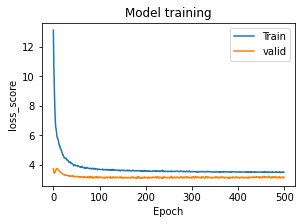

In [33]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [34]:
test_predictions = model.predict(test_X)

In [35]:
from scipy.stats import nbinom
n = test_predictions[:,0]; p = test_predictions[:,1]
y_pred = nbinom.mean(n,p)
test_dataset.obsm["predicted_gene"] = y_pred

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


/scratch/imb/Xiao/.conda/envs/stimage/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/scratch/imb/Xiao/STimage/stimage/utils.py:106: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


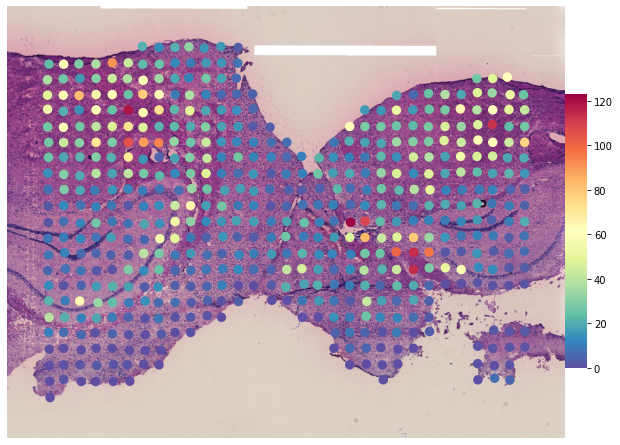


ENSMUSG00000031425:


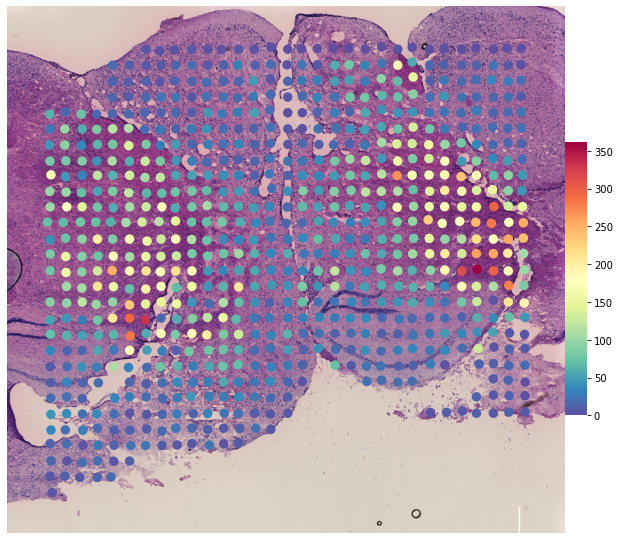

In [36]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [37]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


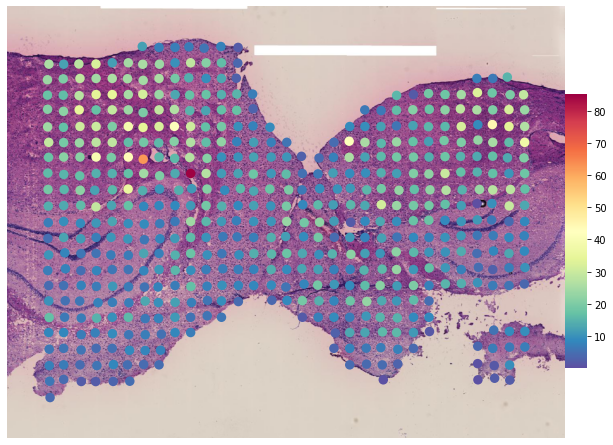


ENSMUSG00000031425:


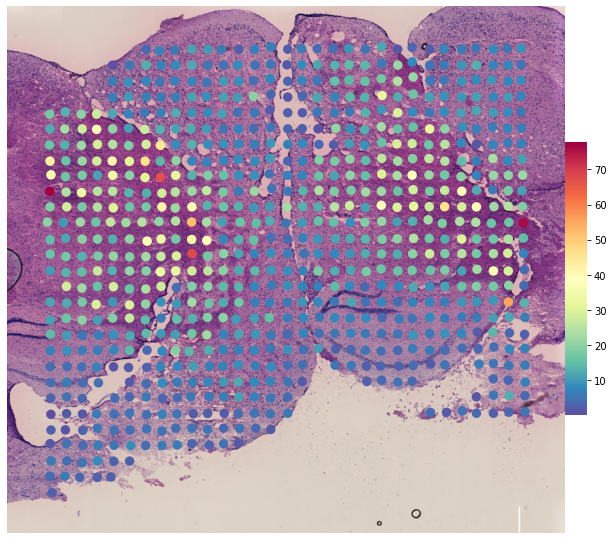

In [38]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

# correlation

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
test_Y_ = test_Y.copy()

In [41]:
test_Y_["pred"] = y_pred

In [42]:
# test_Y_ = test_Y_.sort_values(by=['ENSMUSG00000031425'])

Text(300, 80, '$R^2:0.20$')

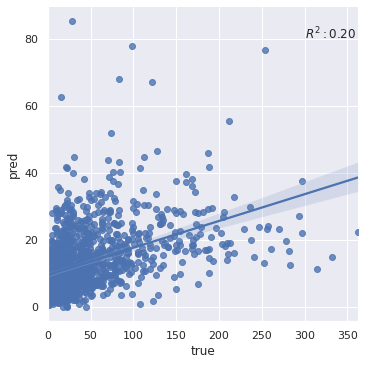

In [68]:
from scipy import stats

r2 = stats.pearsonr(test_Y_["ENSMUSG00000031425"], 
                    test_Y_["pred"],)[0] ** 2
sns.set_theme()
g = sns.lmplot(
    data=test_Y_,
    x="ENSMUSG00000031425", y="pred",
    height=5, legend=True
)
# g.set(ylim=(0, 360), xlim=(0,360))

g.set_axis_labels("true", "pred")
plt.annotate(r'$R^2:{0:.2f}$'.format(r2),
            (300, 80))